### Task 8: Predict future job market trends

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [3]:

# Load the data
job_data1 = pd.read_csv('job_data.csv')

In [4]:
# Convert published_date to datetime
job_data1['published_date'] = pd.to_datetime(job_data1['published_date'], errors='coerce')

# Drop rows with invalid dates
job_data1 = job_data1.dropna(subset=['published_date'])

# Extract year and month from the published_date
job_data1['year_month'] = job_data1['published_date'].dt.to_period('M')

C:\Users\pooji\AppData\Local\Temp\ipykernel_25208\904721914.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  job_data1['year_month'] = job_data1['published_date'].dt.to_period('M')


In [5]:
# Group by year_month to get the count of job postings
monthly_job_postings = job_data1.groupby('year_month').size().reset_index(name='job_postings')

# Ensure year_month is a string for plotting
monthly_job_postings['year_month'] = monthly_job_postings['year_month'].astype(str)

d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


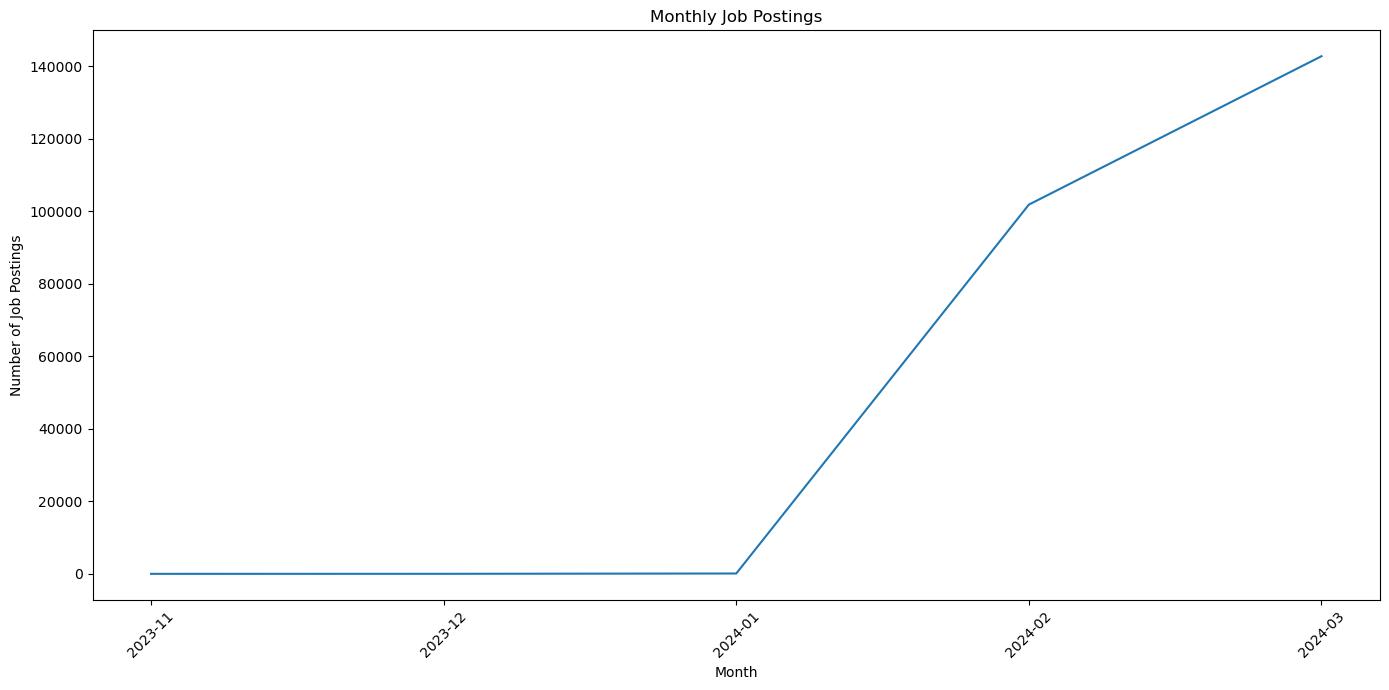

In [6]:
# Plot job postings over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_job_postings, x='year_month', y='job_postings')
plt.title('Monthly Job Postings')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_job_postings.png')
plt.show()

In [7]:

# Fit ARIMA model
model = ARIMA(monthly_job_postings['job_postings'], order=(1, 1, 1))
fit_model = model.fit()

# Forecast future job postings
forecast = fit_model.forecast(steps=12)

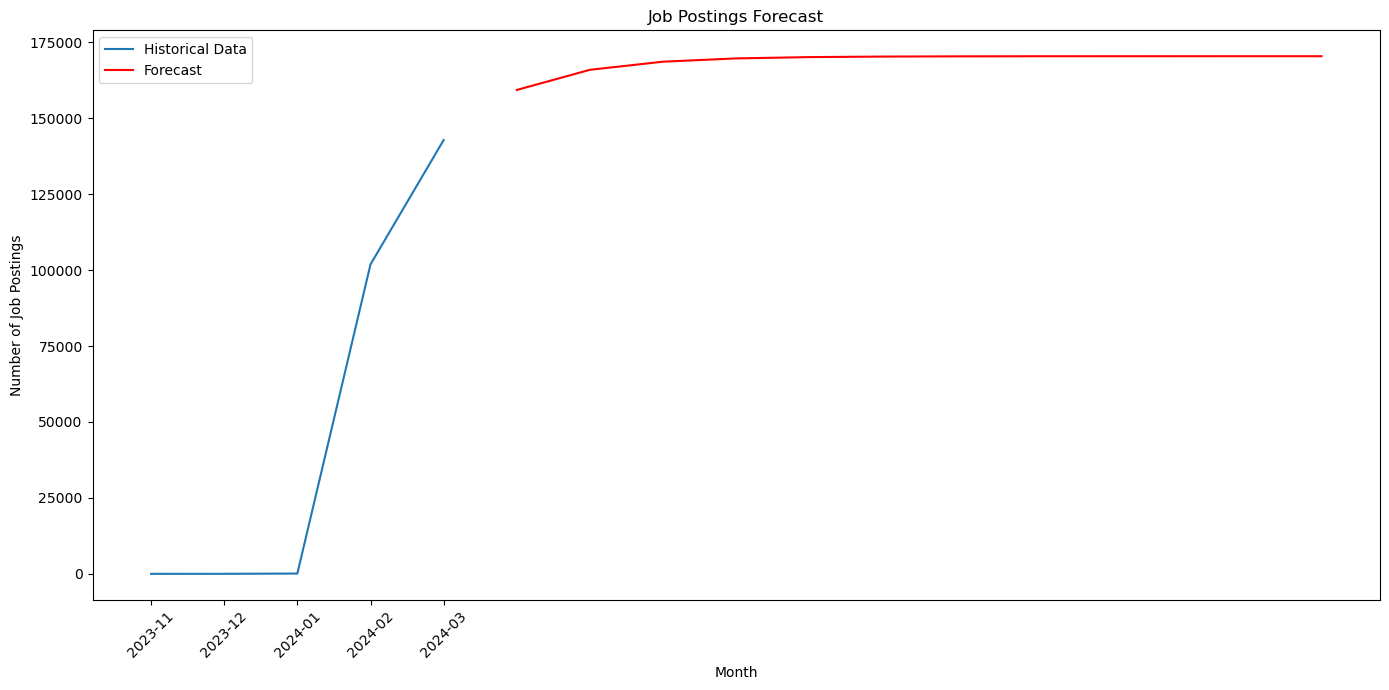

In [8]:

# Plot forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_job_postings['year_month'], monthly_job_postings['job_postings'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Job Postings Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('job_postings_forecast.png')
plt.show()


In [9]:

# Generate predictive analytics report
with open('job_market_trends_report.txt', 'w') as f:
    f.write('Job Market Trends Predictive Analytics Report\n')
    f.write('='*80 + '\n\n')
    f.write('Forecasted Job Postings for Next 12 Months:\n')
    f.write(forecast.to_string())

print("Report generated: job_market_trends_report.txt")

Report generated: job_market_trends_report.txt
